In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from randomized_relu import randomized_relu

In [3]:
log_dir = 'logs_randomized_relu/'
if tf.gfile.IsDirectory(log_dir):
    tf.gfile.DeleteRecursively(log_dir)
tf.gfile.MakeDirs(log_dir)

In [4]:
sess = tf.InteractiveSession()

In [5]:
input_tf = tf.placeholder(shape=[150, 150], dtype=tf.float32, name='input')
is_training = tf.placeholder(shape=[], dtype=tf.bool, name='is_training')

In [6]:
output_tf = randomized_relu(inputs=input_tf, a=3, b=8, training=is_training)

In [7]:
writer = tf.summary.FileWriter(log_dir, graph=sess.graph)
writer.close()

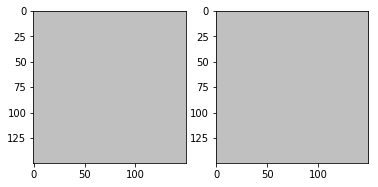

In [9]:
input_np = np.ones(shape=[150, 150], dtype=np.float32)
feed_dict = {input_tf: input_np,
             is_training: True}
output_np = sess.run(output_tf, feed_dict=feed_dict)


plt.subplot(121)
plt.imshow(input_np, cmap='gray', vmin=-2, vmax=2)
plt.subplot(122)
plt.imshow(output_np, cmap='gray', vmin=-2, vmax=2)

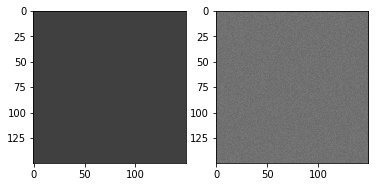

In [10]:
input_np = - np.ones(shape=[150, 150], dtype=np.float32)
feed_dict = {input_tf: input_np,
             is_training: True}
output_np = sess.run(output_tf, feed_dict=feed_dict)


plt.subplot(121)
plt.imshow(input_np, cmap='gray', vmin=-2, vmax=2)
plt.subplot(122)
plt.imshow(output_np, cmap='gray', vmin=-2, vmax=2)
# in TRAINING mode ~95% pixel follow the relu (pixels set to 0)
# only ~5% of pixels follow identity mapping

-0.33332792 -0.3333333333333333
-0.12500636 -0.125


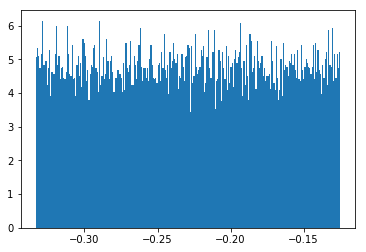

In [14]:
_ = plt.hist(output_np.flatten(), bins=255, density=True)
print(output_np.min(), -1/3)
print(output_np.max(), -1/8)


-0.18181822


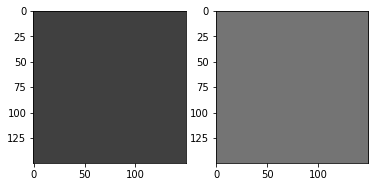

In [15]:
input_np = - np.ones(shape=[150, 150], dtype=np.float32)
feed_dict = {input_tf: input_np,
             is_training: False}
output_np = sess.run(output_tf, feed_dict=feed_dict)


plt.subplot(121)
plt.imshow(input_np, cmap='gray', vmin=-2, vmax=2)
plt.subplot(122)
plt.imshow(output_np, cmap='gray', vmin=-2, vmax=2)
# in TESTING mode 100% of pixel follow a Leaky ReLU activation with slope 1 - p 

print(output_np.mean())

-0.18181819 -0.3333333333333333
-0.18181819 -0.125
-0.18181818181818182


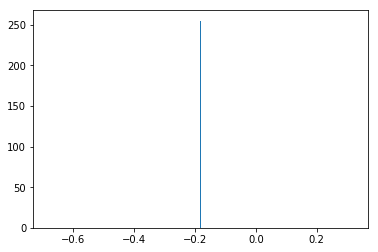

In [17]:
_ = plt.hist(output_np.flatten(), bins=255, density=True)
print(output_np.min(), -1/3)
print(output_np.max(), -1/8)
print(-1/(0.5*(8+3)))